In [1]:

import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

In [2]:
df= pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")
#ForModeling_BagofWords
#ForModeling
#ForModeling_Extra_features

In [3]:
df.shape

(63291, 1013)

In [4]:
df.describe()

,label,avg_sentence_length,text_punctuation_frequency,text_capitalization_frequency,word_count,character_removal_diff,subjectivity_text,text_sentiment,text_reading_ease,text_lexical_diversity,...,BOW_worth,BOW_write,BOW_written,BOW_wrong,BOW_wrote,BOW_ye,BOW_year,BOW_yearold,BOW_york,BOW_young
count,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,...,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000,63291.000000
mean,0.550694,27.576739,59.240398,6.654485,420.794110,86.623896,0.351853,-0.014400,-174.968341,0.733076,...,0.033164,0.051587,0.031647,0.052677,0.084894,0.038489,0.399219,0.051319,0.132120,0.062552
std,0.497427,9.235283,50.292244,6.473979,351.004772,77.550777,0.163645,0.781715,201.540327,0.130371,...,0.179067,0.221194,0.175061,0.223390,0.278725,0.192375,0.489742,0.220648,0.338624,0.242158
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.999800,-1028.460000,0.343284,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.555556,20.000000,2.000000,142.000000,28.000000,0.278458,-0.877900,-268.900000,0.641026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,27.450980,47.000000,5.000000,360.000000,65.000000,0.368683,0.000000,-137.280000,0.707763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,32.454545,81.000000,9.000000,584.000000,121.000000,0.448587,0.855500,-16.500000,0.797468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,63.000000,289.000000,34.000000,1941.000000,404.000000,0.950000,0.999900,121.220000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['text', 'label', 'source', 'avg_sentence_length',
       'text_punctuation_frequency', 'text_capitalization_frequency',
       'word_count', 'character_removal_diff', 'text_processed',
       'subjectivity_text',
       ...
       'BOW_worth', 'BOW_write', 'BOW_written', 'BOW_wrong', 'BOW_wrote',
       'BOW_ye', 'BOW_year', 'BOW_yearold', 'BOW_york', 'BOW_young'],
      dtype='object', length=1013)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63291 entries, 3580 to 15795
Columns: 1013 entries, text to BOW_young
dtypes: float64(6), int32(2), int64(1002), object(3)
memory usage: 489.1+ MB


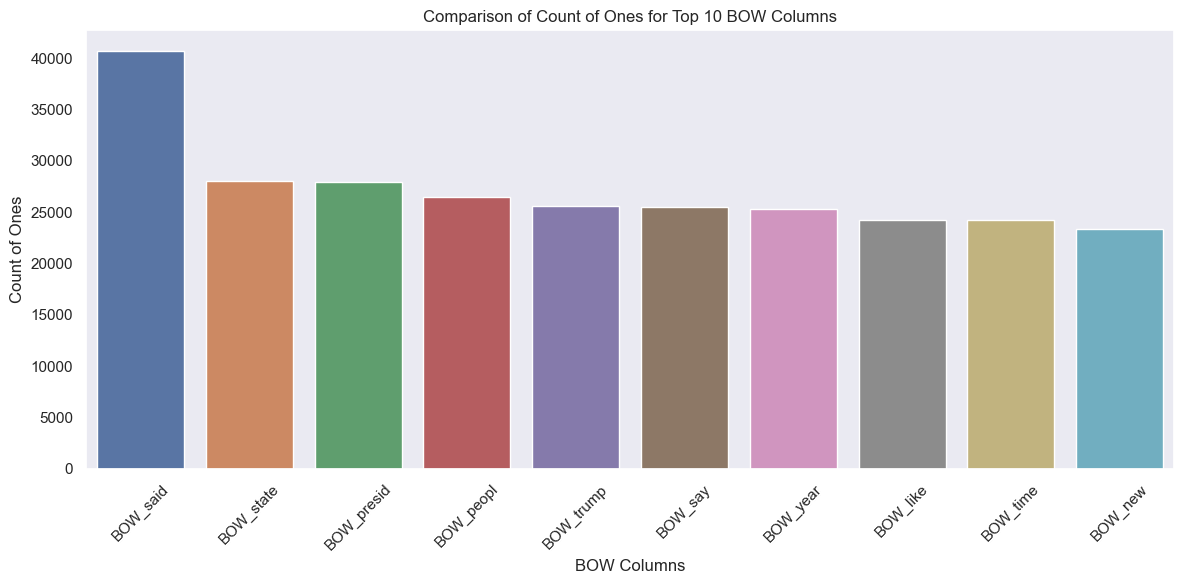

In [7]:

# Assuming your data is stored in a DataFrame called 'data'
# Filter columns that start with 'BOW_'
bow_columns = [col for col in df.columns if col.startswith('BOW_')]

# Calculate the count of ones for each 'BOW_' column
ones_counts = df[bow_columns].sum()

# Create a DataFrame for visualization
ones_counts_df = pd.DataFrame({'BOW_Column': ones_counts.index, 'Count_Ones': ones_counts.values})

# Plot a comparison graph using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='BOW_Column', y='Count_Ones', data=ones_counts_df.sort_values('Count_Ones', ascending=False).head(10))
plt.xticks(rotation=45)
plt.xlabel('BOW Columns')
plt.ylabel('Count of Ones')
plt.title('Comparison of Count of Ones for Top 10 BOW Columns')
plt.tight_layout()
plt.show()


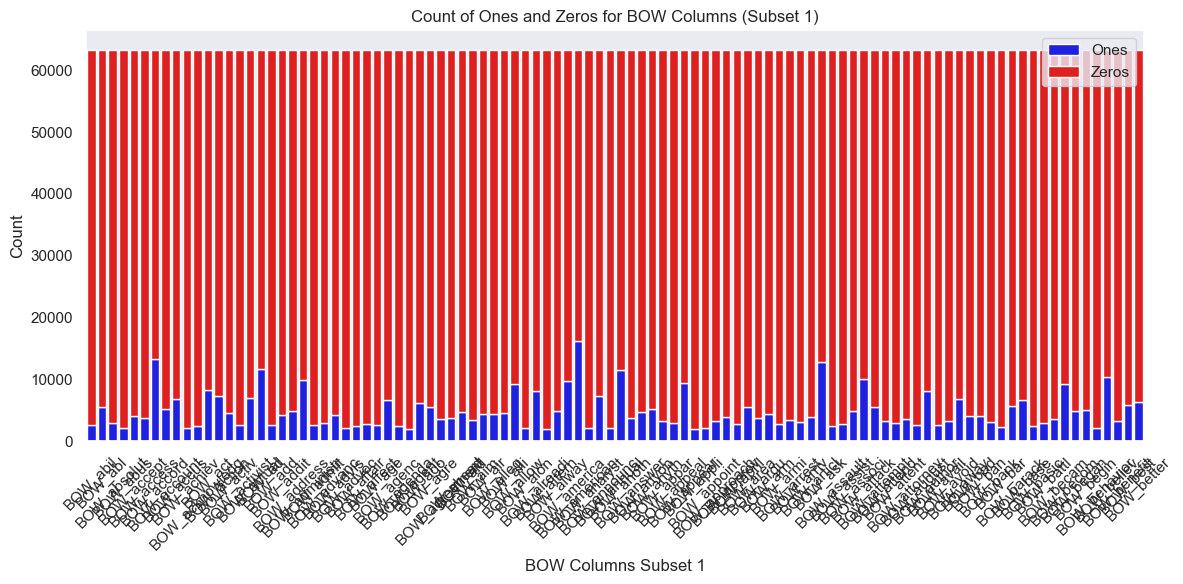

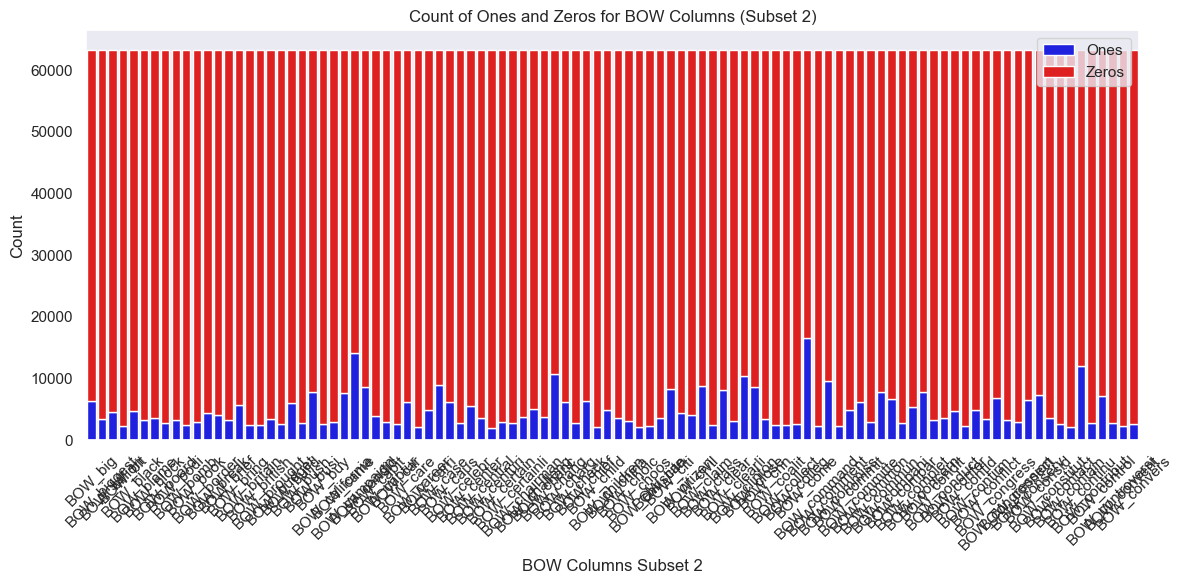

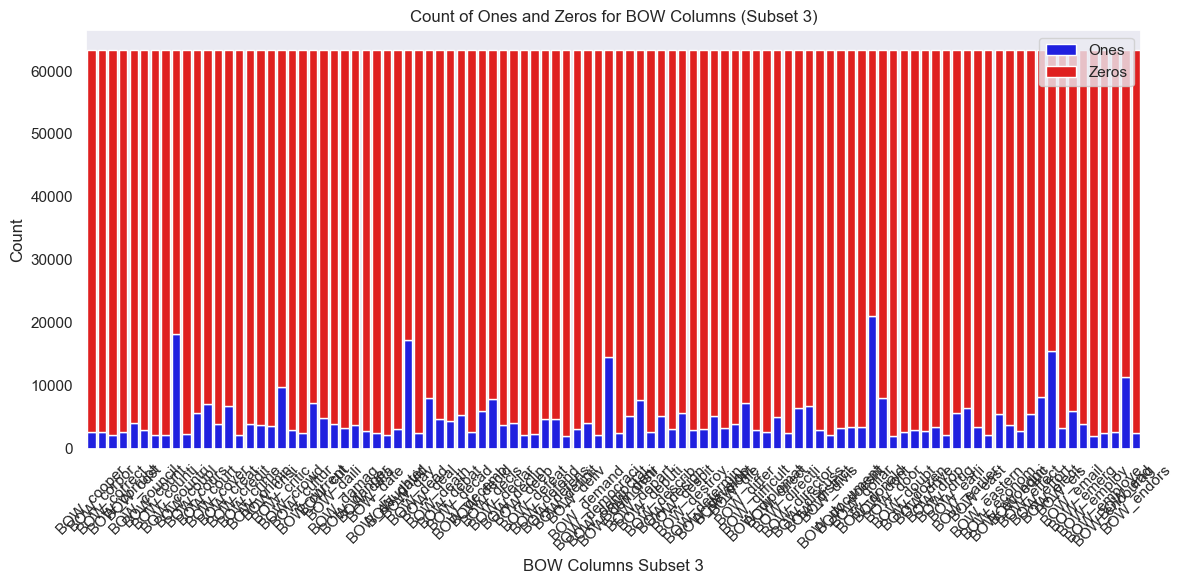

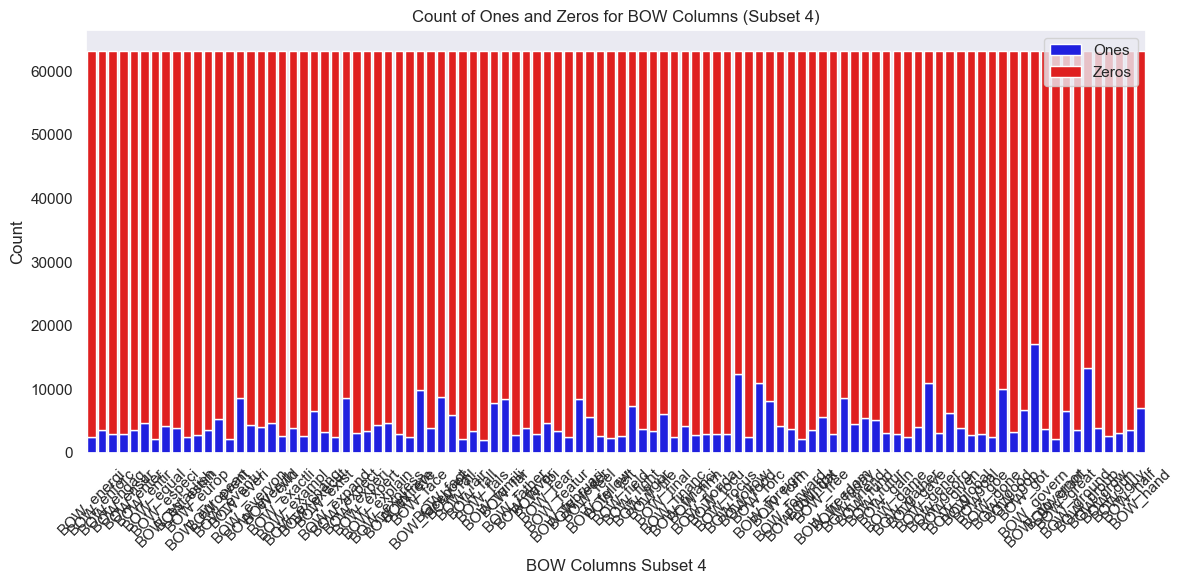

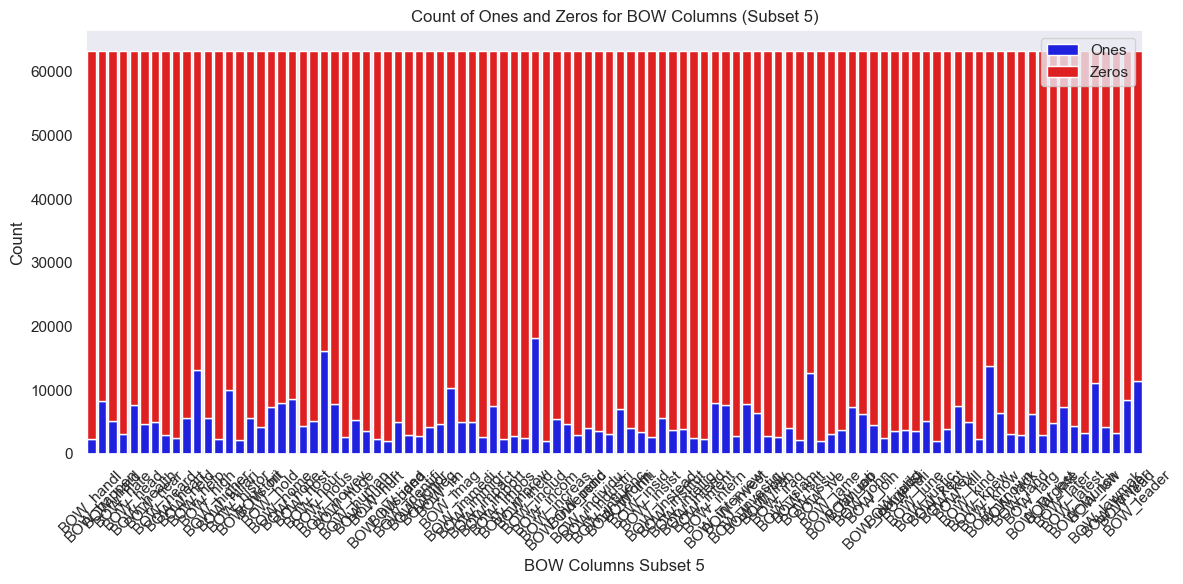

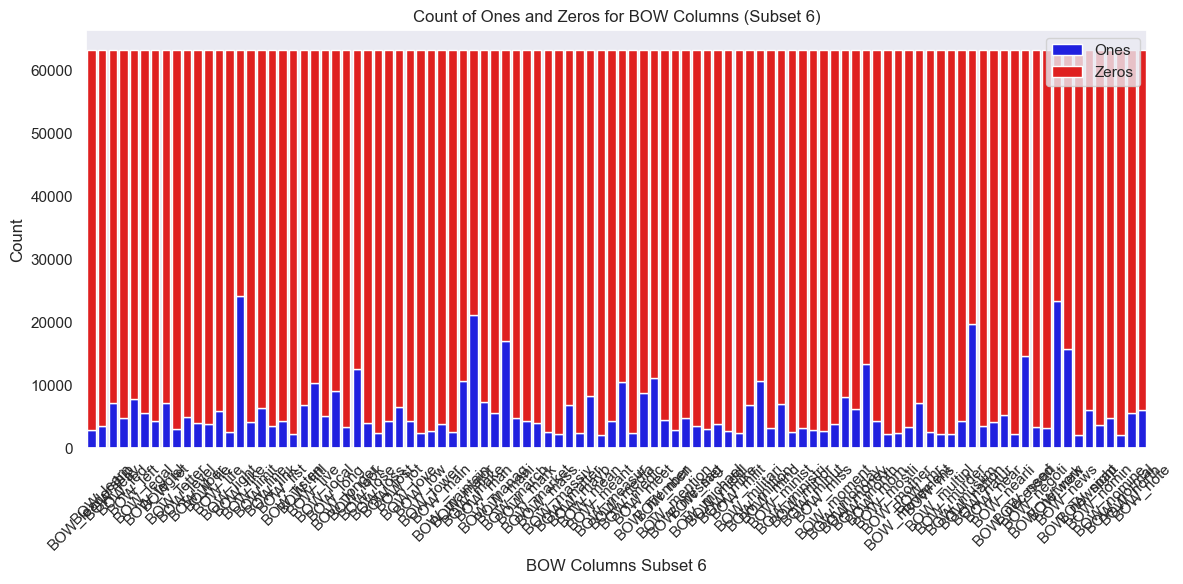

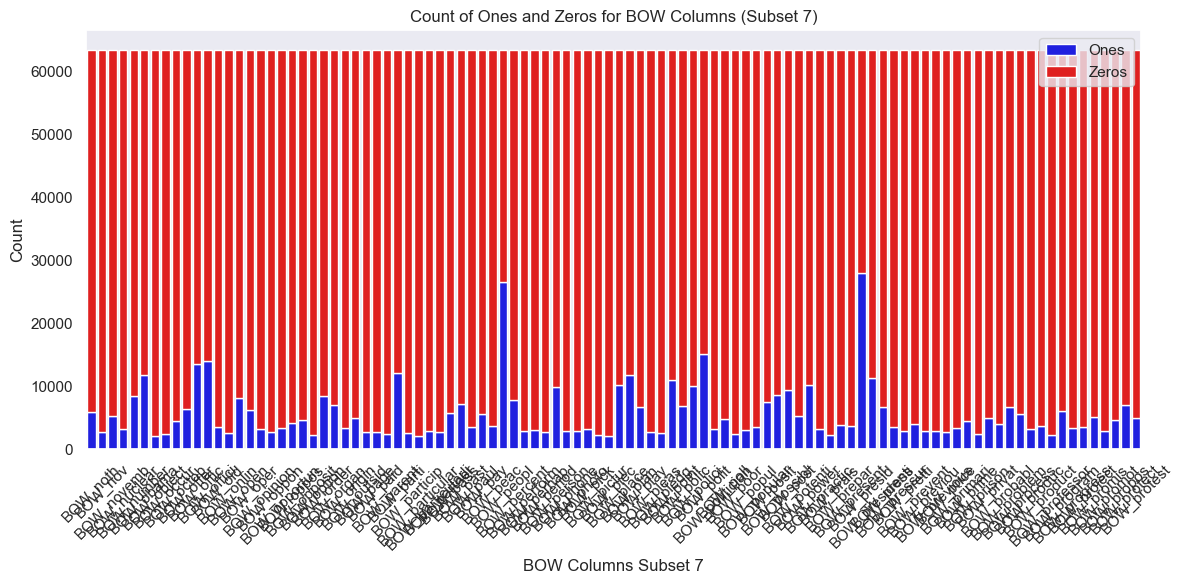

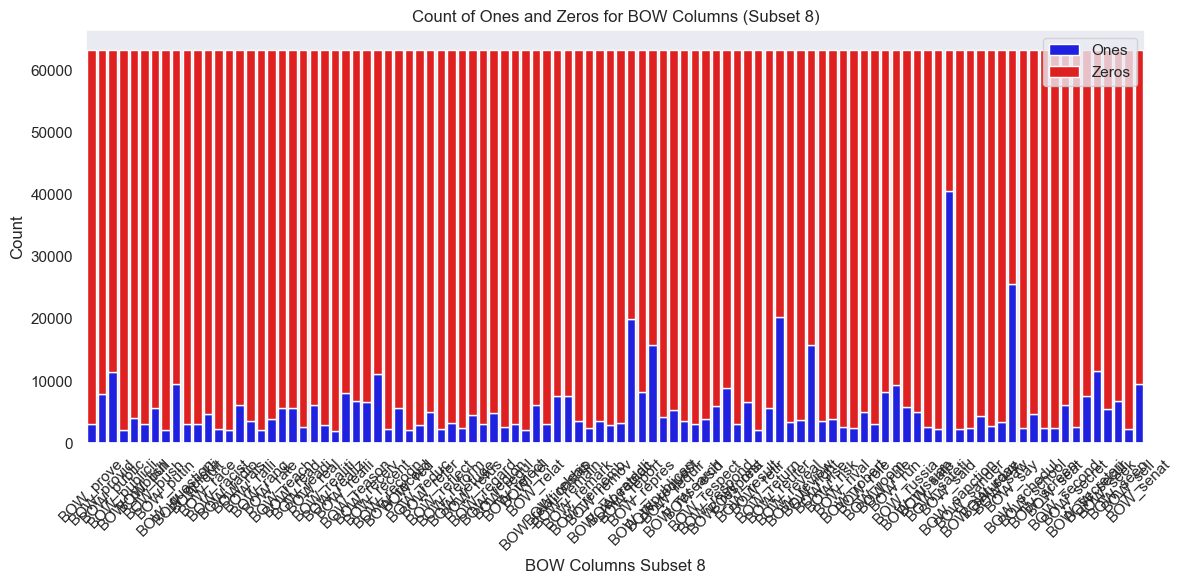

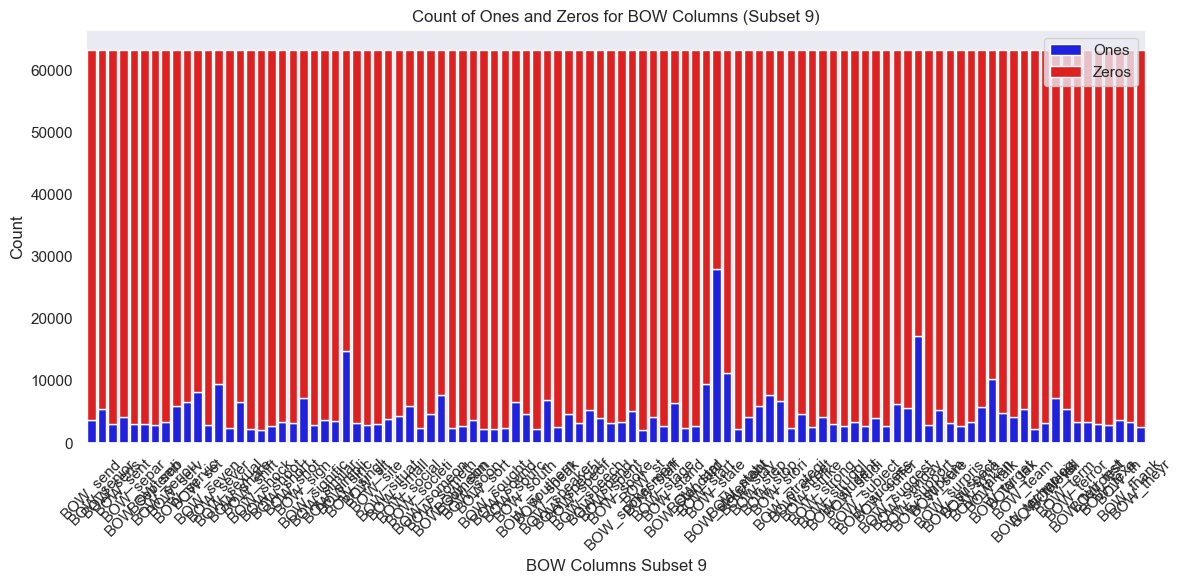

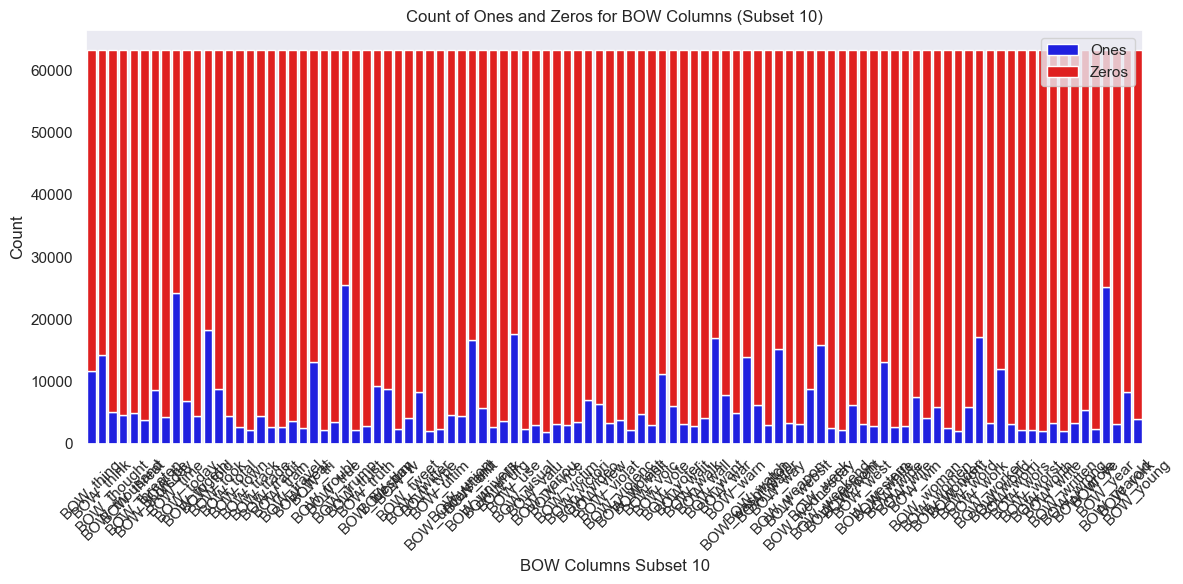

In [8]:
bow_columns = [col for col in df.columns if col.startswith('BOW_')]

# Split 'BOW_' columns into subsets of 100 columns each
num_subsets = (len(bow_columns) // 100) + 1
bow_subsets = [bow_columns[i:i+100] for i in range(0, len(bow_columns), 100)]

# Plotting count of ones and zeros for subsets of 'BOW_' columns
for i, subset in enumerate(bow_subsets, start=1):
    subset_counts = df[subset].apply(pd.Series.value_counts).T
    subset_counts.columns = ['Zeros', 'Ones']
    subset_counts.fillna(0, inplace=True)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=subset_counts.index, y=subset_counts['Ones'], color='blue', label='Ones')
    sns.barplot(x=subset_counts.index, y=subset_counts['Zeros'], color='red', label='Zeros', bottom=subset_counts['Ones'])
    plt.xticks(rotation=45)
    plt.xlabel(f'BOW Columns Subset {i}')
    plt.ylabel('Count')
    plt.title(f'Count of Ones and Zeros for BOW Columns (Subset {i})')
    plt.legend()
    plt.tight_layout()
    plt.show()

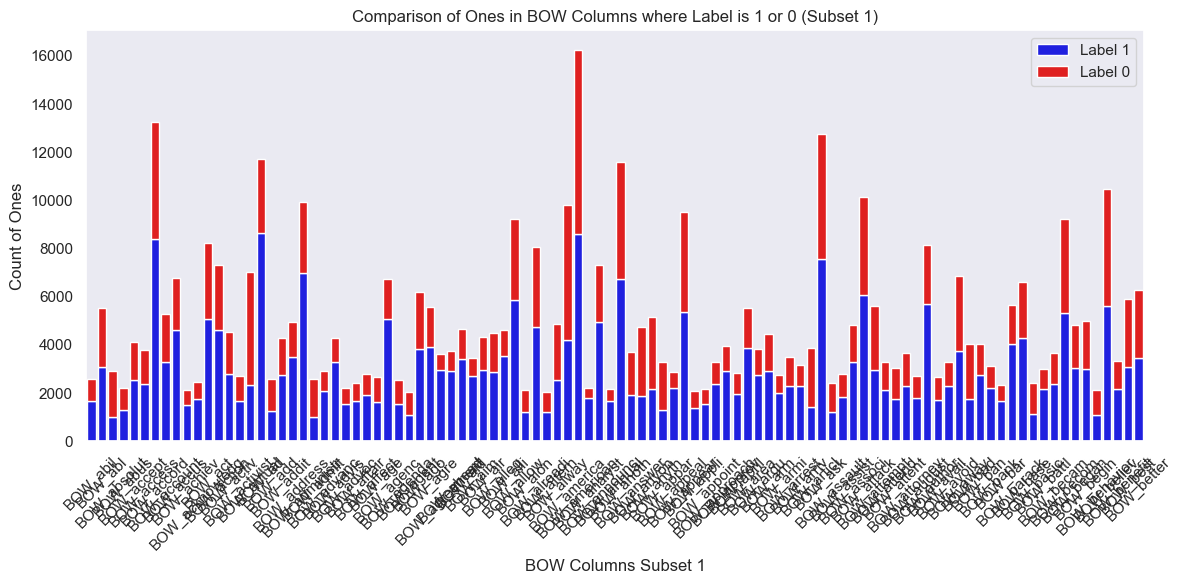

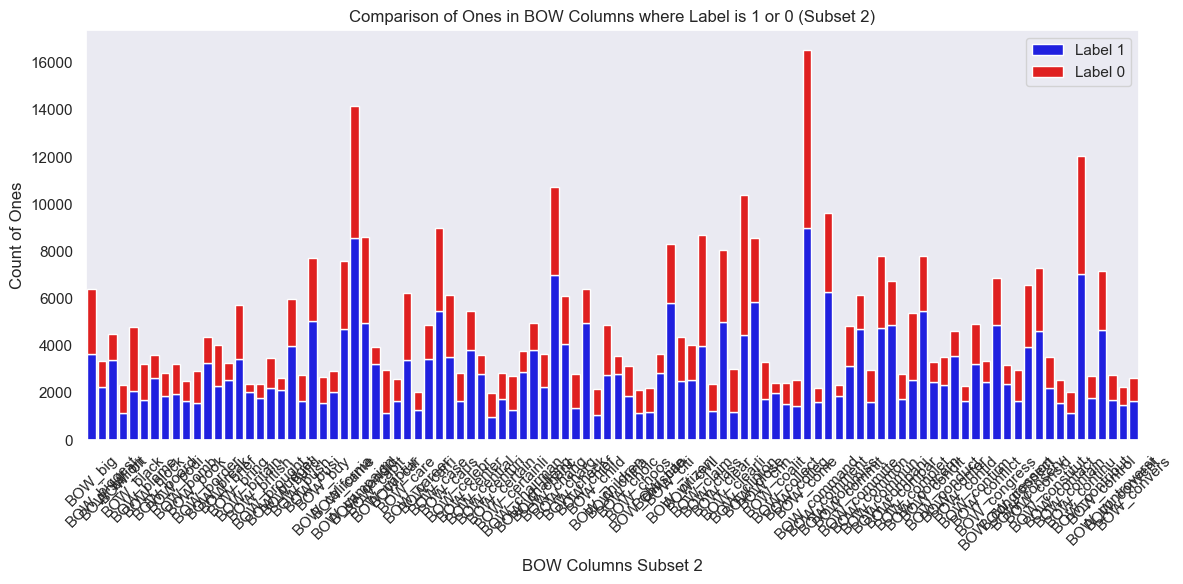

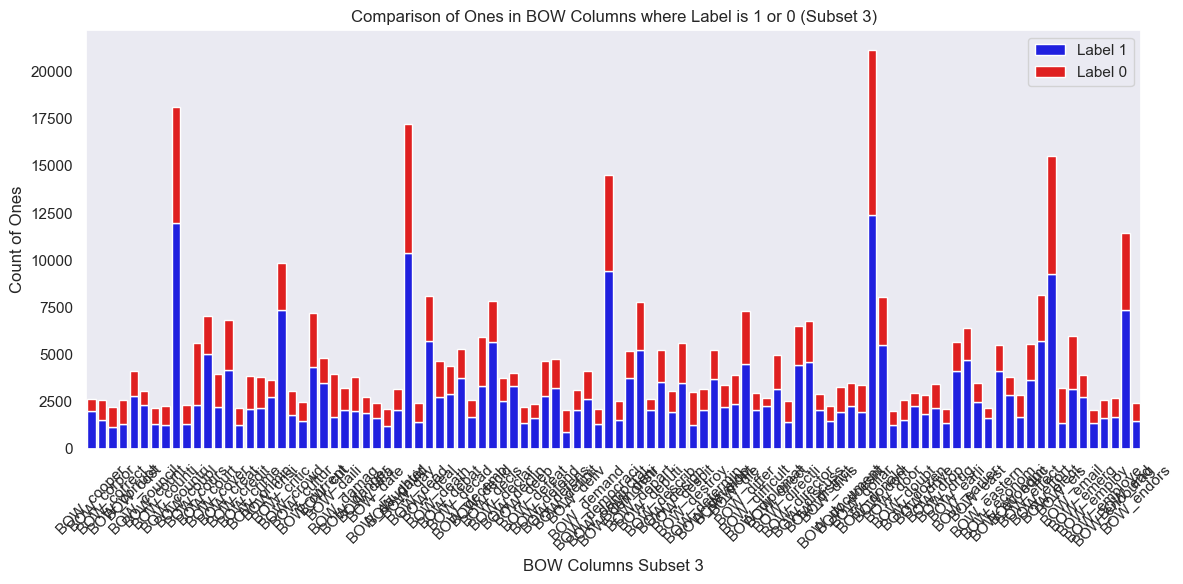

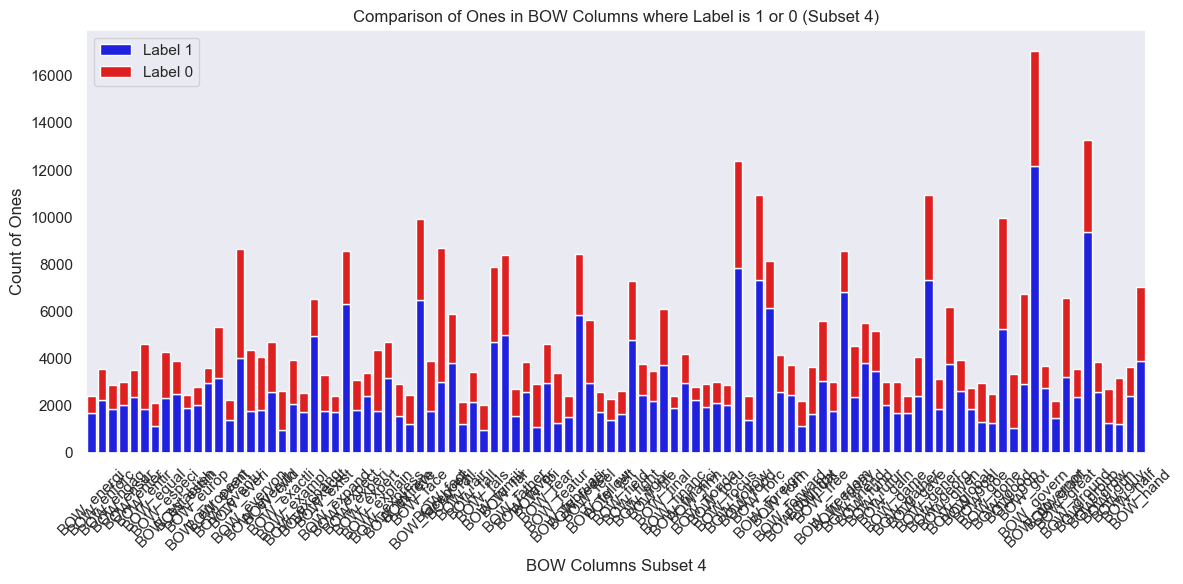

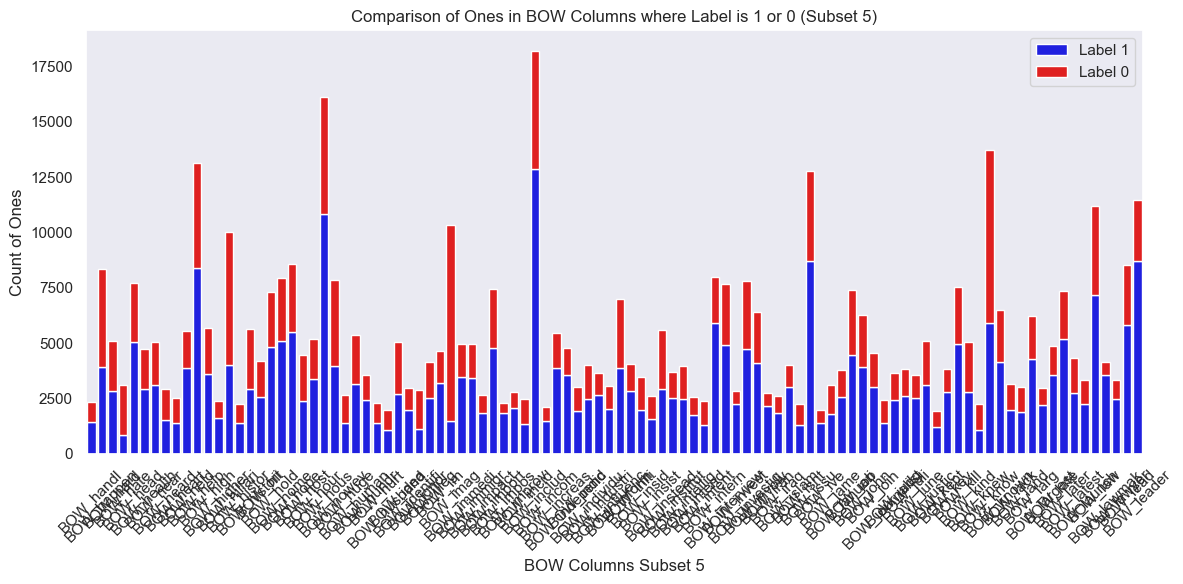

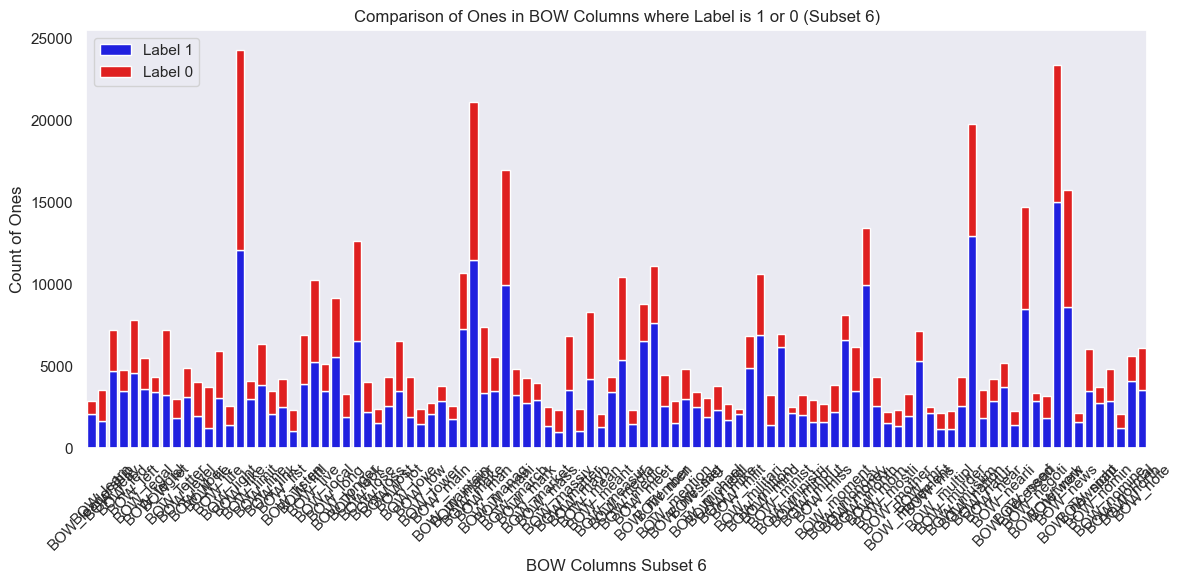

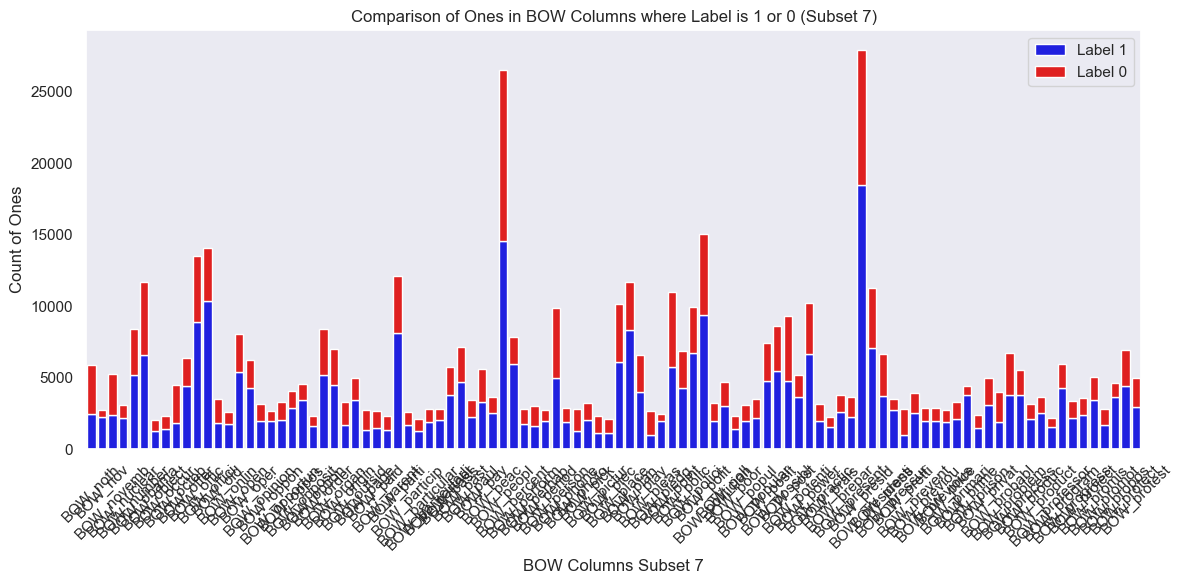

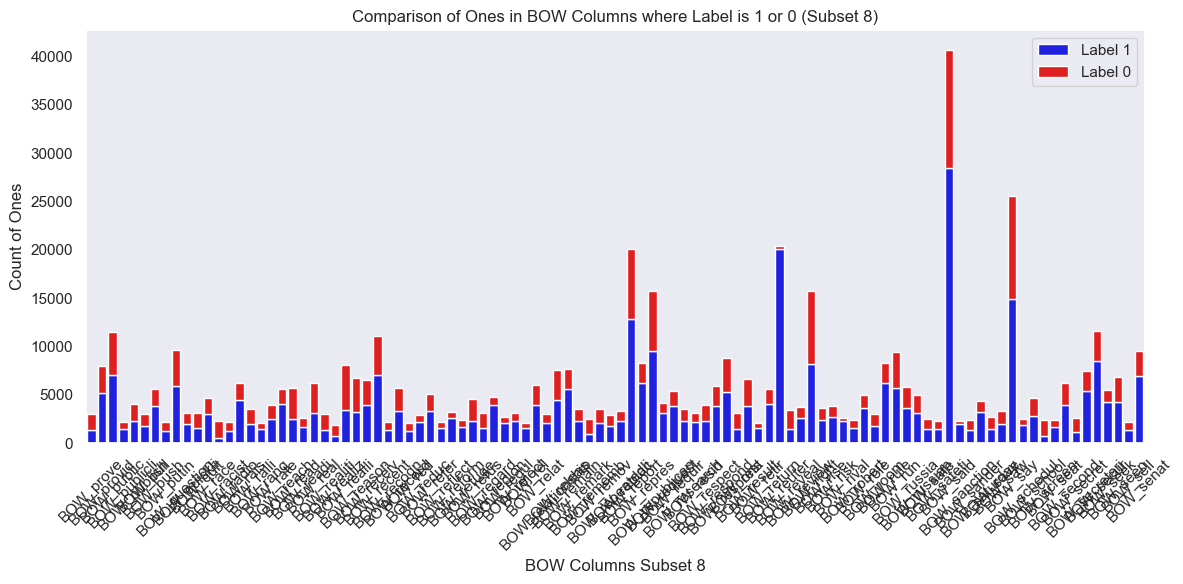

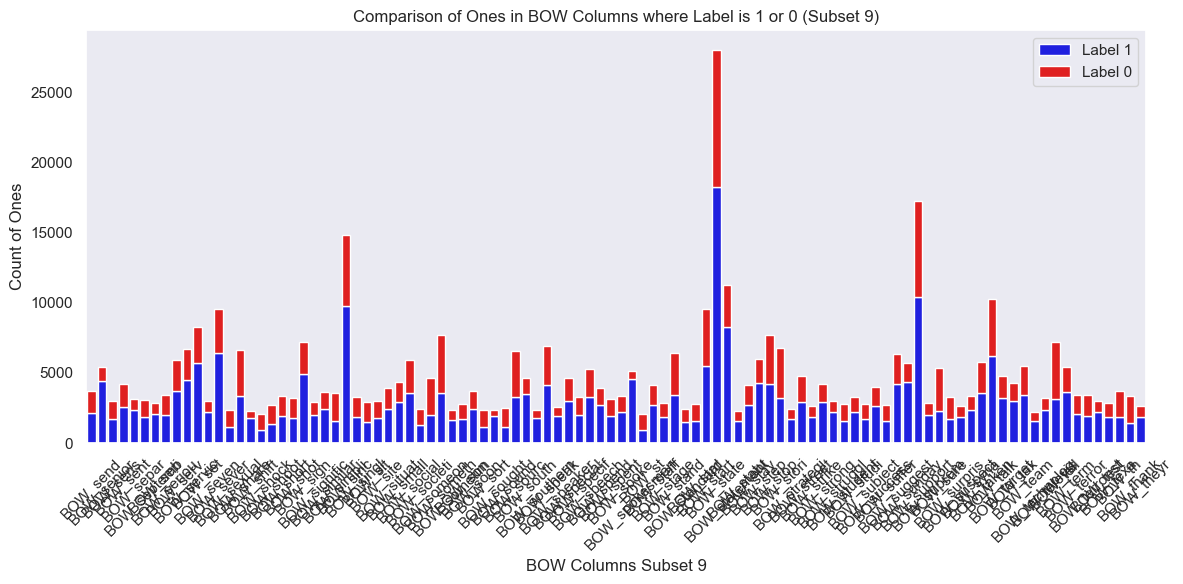

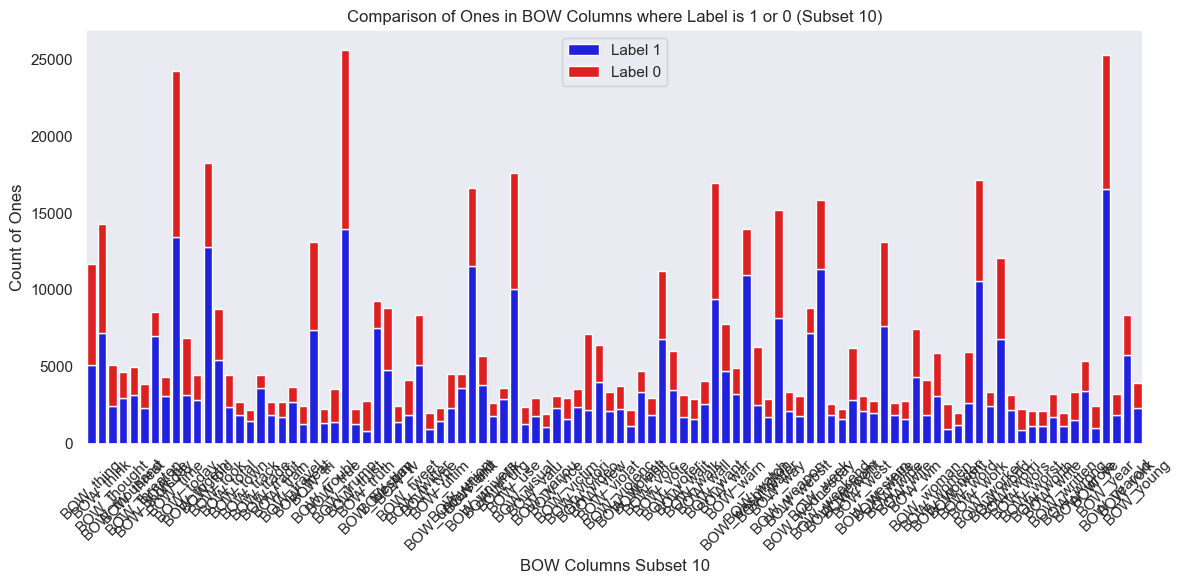

In [9]:
bow_columns = [col for col in df.columns if col.startswith('BOW_')]

# Split 'BOW_' columns into subsets of 100 columns each
num_subsets = (len(bow_columns) // 100) + 1
bow_subsets = [bow_columns[i:i+100] for i in range(0, len(bow_columns), 100)]

# Calculate ones for label 1 and label 0 for each subset of 'BOW_' columns
for i, subset in enumerate(bow_subsets, start=1):
    ones_in_label_1 = df[df['label'] == 1][subset].sum()
    zeros_in_label_0 = df[df['label'] == 0][subset].sum()

    ones_in_label_1_df = pd.DataFrame({'BOW_Column': ones_in_label_1.index, f'Count_Ones_Label_1_Subset_{i}': ones_in_label_1.values})
    zeros_in_label_0_df = pd.DataFrame({'BOW_Column': zeros_in_label_0.index, f'Count_Ones_Label_0_Subset_{i}': zeros_in_label_0.values})

    label_comparison_subset_df = pd.merge(ones_in_label_1_df, zeros_in_label_0_df, on='BOW_Column')

    plt.figure(figsize=(12, 6))
    sns.barplot(x='BOW_Column', y=f'Count_Ones_Label_1_Subset_{i}', data=label_comparison_subset_df, color='blue', label='Label 1')
    sns.barplot(x='BOW_Column', y=f'Count_Ones_Label_0_Subset_{i}', data=label_comparison_subset_df, color='red', label='Label 0', bottom=label_comparison_subset_df[f'Count_Ones_Label_1_Subset_{i}'])
    plt.xticks(rotation=45)
    plt.xlabel(f'BOW Columns Subset {i}')
    plt.ylabel('Count of Ones')
    plt.title(f'Comparison of Ones in BOW Columns where Label is 1 or 0 (Subset {i})')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
columns_to_plot = df.columns.iloc[:, :-1000]

# Create a pairplot with 'label' as hue
sns.pairplot(df[columns_to_plot], hue='label', diag_kind='hist')
plt.suptitle('Pairplot of First 13 Columns with Label')
plt.show()

AttributeError: 'Index' object has no attribute 'loc'

In [12]:
df.iloc[:, :-1000].columns

Index(['text', 'label', 'source', 'avg_sentence_length',
       'text_punctuation_frequency', 'text_capitalization_frequency',
       'word_count', 'character_removal_diff', 'text_processed',
       'subjectivity_text', 'text_sentiment', 'text_reading_ease',
       'text_lexical_diversity'],
      dtype='object')

In [13]:
df_num=df[df.iloc[:, :-1000].columns]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63291 entries, 3580 to 15795
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           63291 non-null  object 
 1   label                          63291 non-null  float64
 2   source                         63291 non-null  object 
 3   avg_sentence_length            63291 non-null  float64
 4   text_punctuation_frequency     63291 non-null  int64  
 5   text_capitalization_frequency  63291 non-null  int32  
 6   word_count                     63291 non-null  int32  
 7   character_removal_diff         63291 non-null  int64  
 8   text_processed                 63291 non-null  object 
 9   subjectivity_text              63291 non-null  float64
 10  text_sentiment                 63291 non-null  float64
 11  text_reading_ease              63291 non-null  float64
 12  text_lexical_diversity         63291 non-null  f

In [14]:
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is the DataFrame
manova = MANOVA.from_formula('word_count + avg_sentence_length + subjectivity_text ~ label', data=df_num)
print(manova.mv_test())



                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF     F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda 0.1550 3.0000 63287.0000 115002.5230 0.0000
         Pillai's trace 0.8450 3.0000 63287.0000 115002.5230 0.0000
 Hotelling-Lawley trace 5.4515 3.0000 63287.0000 115002.5230 0.0000
    Roy's greatest root 5.4515 3.0000 63287.0000 115002.5230 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
           label          Value  Num DF   Den DF    F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda 0.9543 3.0000 63287.0000 1009.8637 0.0000
 

In [15]:
from sklearn.cross_decomposition import CCA
X = df_num[['word_count', 'avg_sentence_length', 'text_sentiment']]
Y = df_num[['subjectivity_text', 'text_reading_ease', 'text_lexical_diversity']]


cca = CCA(n_components=2)
cca.fit(X, Y)
print(cca.x_weights_)
print(cca.y_weights_)

# Transform the data
X_c, Y_c = cca.transform(X, Y)
print(X_c)
print(Y_c)

[[ 0.99985671 -0.01669783]
 [ 0.01688101  0.99576353]
 [-0.00126141  0.09042223]]
[[ 0.02757729  0.16000079]
 [-0.99954821  0.0162165 ]
 [-0.01195236 -0.98698367]]
[[ 0.20348423  0.08662066]
 [ 0.22121048 -0.12952008]
 [-0.93691513  0.40092675]
 ...
 [-0.36651055  0.86868581]
 [ 0.50624577  0.1963357 ]
 [-1.14839111 -0.11587742]]
[[ 0.27268687  0.19320606]
 [ 0.36998052 -0.32167344]
 [-0.83103846  0.42332455]
 ...
 [-0.40600647  0.56303888]
 [ 0.57001205  0.44492568]
 [-1.23617892  1.56818468]]


In [20]:
from sklearn.manifold import MDS

# Assuming 'data' contains the DataFrame
dissimilarity_matrix = ...  # Create a dissimilarity matrix
mds = MDS(n_components=2, dissimilarity='precomputed')
result = mds.fit_transform(dissimilarity_matrix)


ValueError: Expected 2D array, got scalar array instead:
array=Ellipsis.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
from sklearn.decomposition import PCA

# Assuming 'data' contains the DataFrame with numerical columns
pca = PCA(n_components=3)
pca.fit(data)
transformed_data = pca.transform(data)


NameError: name 'data' is not defined

In [18]:
from factor_analyzer import FactorAnalyzer

# Assuming 'data' contains the DataFrame with observed variables
fa = FactorAnalyzer(n_factors=5)
fa.fit(data)


ModuleNotFoundError: No module named 'factor_analyzer'

In [19]:
from scipy.stats import mannwhitneyu, kruskal, wilcoxon

# Example usage
u_stat, p_value = mannwhitneyu(data1, data2)
h_stat, p_value = kruskal(data1, data2, data3)
w_stat, p_value = wilcoxon(data1, data2)


NameError: name 'data1' is not defined

In [21]:
from sklearn.impute import KNNImputer, IterativeImputer

# Assuming 'data' contains the DataFrame with missing values
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = knn_imputer.fit_transform(data)

iterative_imputer = IterativeImputer()
data_imputed = iterative_imputer.fit_transform(data)


ImportError: IterativeImputer is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:
from sklearn.experimental import enable_iterative_imputer